In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
import pandas as pd
import numpy as np

In [4]:
d = pd.read_csv('../Data/frasier_test.csv',names=['time','score'])

In [11]:
d = d.set_index('time')

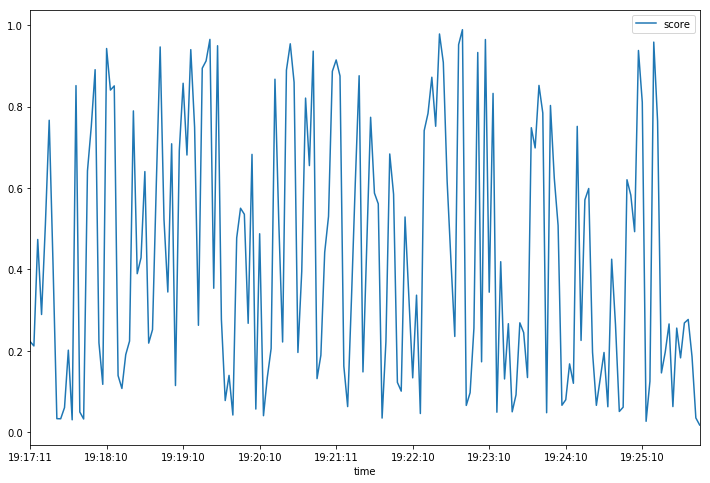

In [12]:
d.plot()

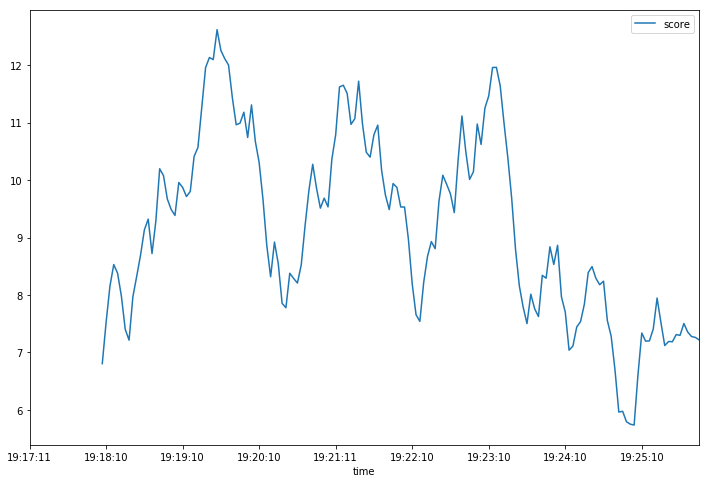

In [31]:
d.rolling(window=20).sum().plot()

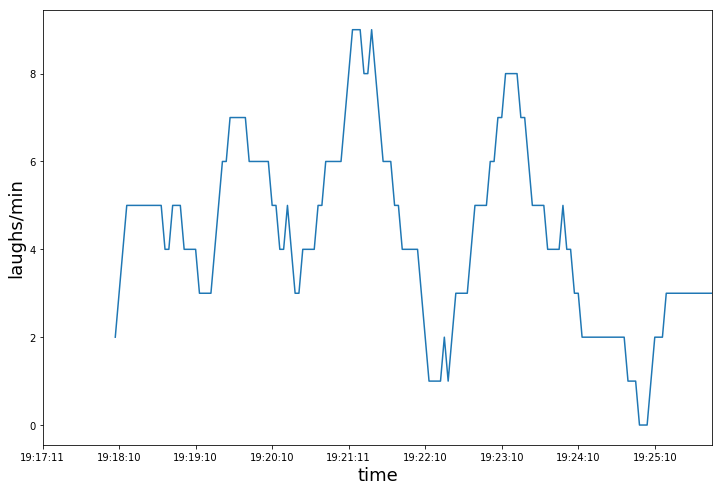

In [88]:
(d['score']>0.8).rolling(window=20).sum().plot()
plt.xlabel('time',size=18)
plt.ylabel('laughs/min',size=18)

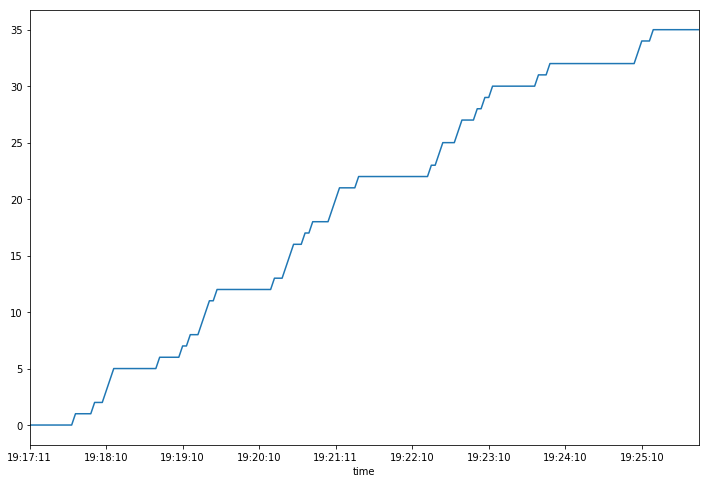

In [34]:
(d['score']>0.8).cumsum().plot()

In [37]:
val = (d['score']>0.8).values

In [38]:
len(val)

176

In [55]:
l = 40
e = np.exp(-np.arange(len(val))/l)

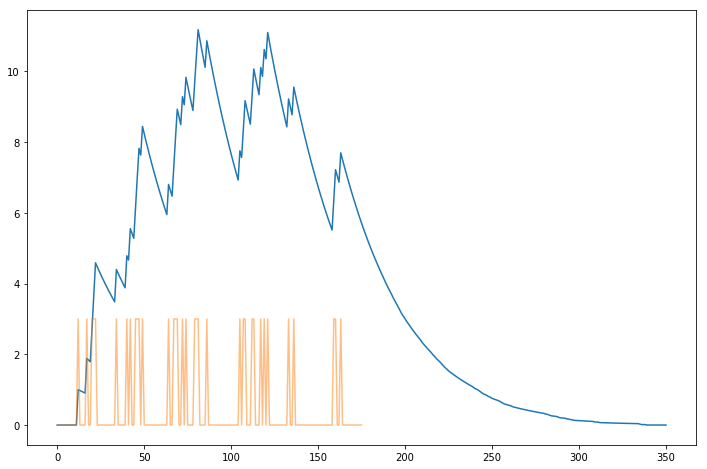

In [56]:
plt.plot(np.convolve(e,val))
plt.plot(val*3,alpha=0.5)

## DS MEETING

In [74]:
d2 = pd.read_csv('../Data/DS_Discipline_meeting/recordings.csv',names=['time','file','score','vol'])
d2 = d2.set_index('time')

In [78]:
d2['log_vol'] = d2['vol'].apply(np.log)

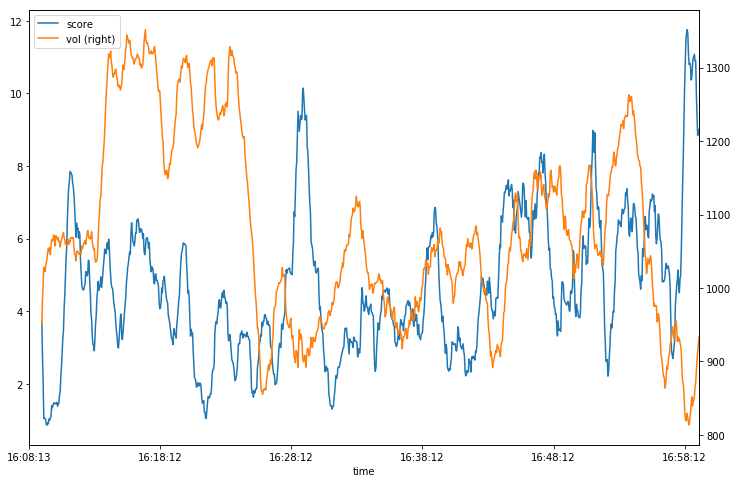

In [84]:
d2[['score','vol']].rolling(window=20).sum().plot(secondary_y=['vol'])

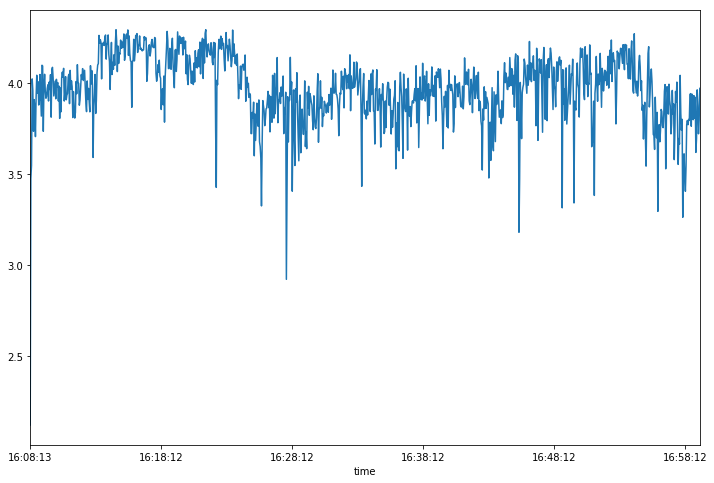

In [77]:
d2['vol'].apply(lambda x: np.log(x)).rolling(window=1).sum().plot()

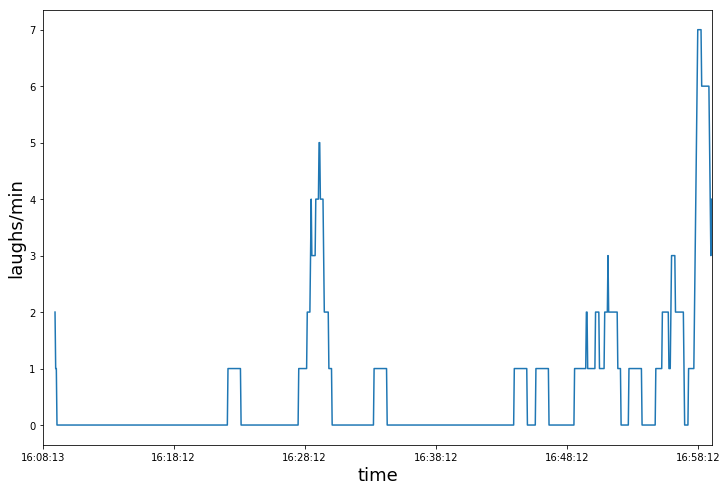

In [87]:
(d2['score']>0.8).rolling(window=20).sum().plot()
plt.xlabel('time',size=18)
plt.ylabel('laughs/min',size=18)

In [93]:
d2.index = d2.index.to_datetime()

/Users/nsteins/Documents/DeepProduct/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  """Entry point for launching an IPython kernel.


In [102]:
d2['laugh'] = d2['score']>0.8

In [103]:
d2.groupby(pd.TimeGrouper('10Min')).sum()

,score,vol,log_vol,laugh
2018-02-20 16:00:00,4.936659,1798.493839,139.505716,2.0
2018-02-20 16:10:00,49.573580,12092.694417,818.673946,0.0
2018-02-20 16:20:00,38.775471,10806.831095,793.935498,7.0
2018-02-20 16:30:00,36.428766,10092.750405,782.871842,1.0
2018-02-20 16:40:00,51.146150,10529.036563,790.372087,4.0
2018-02-20 16:50:00,61.283279,9717.756582,735.365240,19.0
